In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [2]:
# Load the dataset
train_data = pd.read_csv('../data/raw/train.csv')
train_data.head()

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,0,MINI,Cooper S Base,2007,213000,Gasoline,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,A/T,Yellow,Gray,None reported,Yes,4200
1,1,Lincoln,LS V8,2002,143250,Gasoline,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,A/T,Silver,Beige,At least 1 accident or damage reported,Yes,4999
2,2,Chevrolet,Silverado 2500 LT,2002,136731,E85 Flex Fuel,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,A/T,Blue,Gray,None reported,Yes,13900
3,3,Genesis,G90 5.0 Ultimate,2017,19500,Gasoline,420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,45000
4,4,Mercedes-Benz,Metris Base,2021,7388,Gasoline,208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,Black,Beige,None reported,Yes,97500


## Missing Values

In [3]:
# Check for missing values
print("\n--- Missing Values ---\n")
missing_values = train_data.isnull().sum()
print(missing_values[missing_values > 0])



--- Missing Values ---

fuel_type       5083
accident        2452
clean_title    21419
dtype: int64


In [4]:

# Impute missing values
# For 'fuel_type', impute with mode
fuel_type_mode = train_data['fuel_type'].mode()[0]
train_data['fuel_type'].fillna(fuel_type_mode, inplace=True)

# For 'accident', impute with 'None reported'
train_data['accident'].fillna('None reported', inplace=True)

# For 'clean_title', impute with mode
clean_title_mode = train_data['clean_title'].mode()[0]
train_data['clean_title'].fillna(clean_title_mode, inplace=True)
train_data = train_data.drop('clean_title', axis = 1)


In [5]:
# Check for missing values
print("\n--- Missing Values ---\n")
missing_values = train_data.isnull().sum()
print(missing_values[missing_values > 0])



--- Missing Values ---

Series([], dtype: int64)


In [6]:
train_data.head()

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,price
0,0,MINI,Cooper S Base,2007,213000,Gasoline,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,A/T,Yellow,Gray,None reported,4200
1,1,Lincoln,LS V8,2002,143250,Gasoline,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,A/T,Silver,Beige,At least 1 accident or damage reported,4999
2,2,Chevrolet,Silverado 2500 LT,2002,136731,E85 Flex Fuel,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,A/T,Blue,Gray,None reported,13900
3,3,Genesis,G90 5.0 Ultimate,2017,19500,Gasoline,420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,45000
4,4,Mercedes-Benz,Metris Base,2021,7388,Gasoline,208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,Black,Beige,None reported,97500


## Cleaning Target

C:\Users\Brett Lill\AppData\Roaming\Python\Python39\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


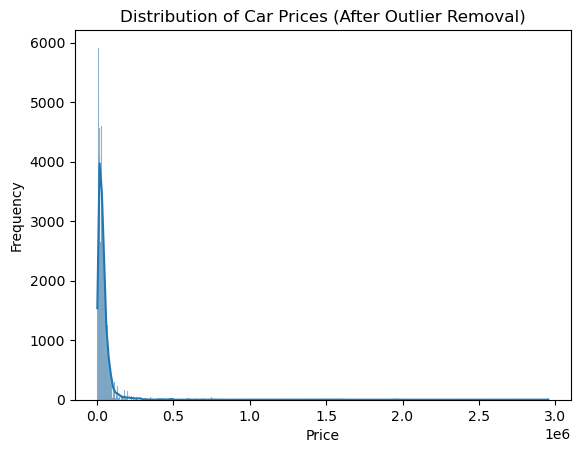

In [7]:
# Distribution of the target variable (car price) after removing outliers
sns.histplot(train_data['price'], kde=True)
plt.title('Distribution of Car Prices (After Outlier Removal)')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

C:\Users\Brett Lill\AppData\Roaming\Python\Python39\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


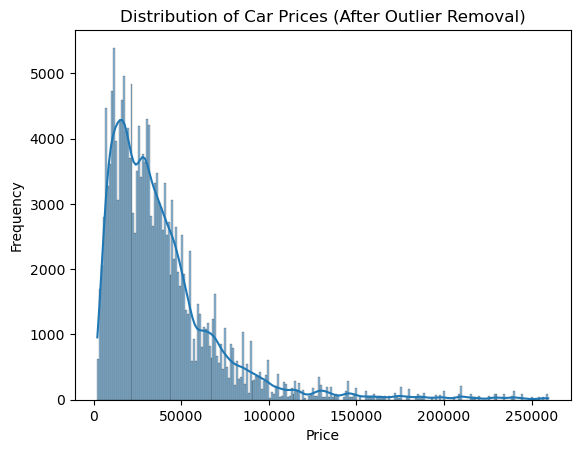

In [8]:
# Remove extreme outliers based on a reasonable threshold (e.g., 99th percentile)
price_threshold = train_data['price'].quantile(0.99)
train_data = train_data[train_data['price'] <= price_threshold]

# Distribution of the target variable (car price) after removing outliers
sns.histplot(train_data['price'], kde=True)
plt.title('Distribution of Car Prices (After Outlier Removal)')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

In [9]:
# Apply log transformation to the 'price' column to reduce skewness
train_data['price'] = np.log1p(train_data['price'])

C:\Users\Brett Lill\AppData\Roaming\Python\Python39\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


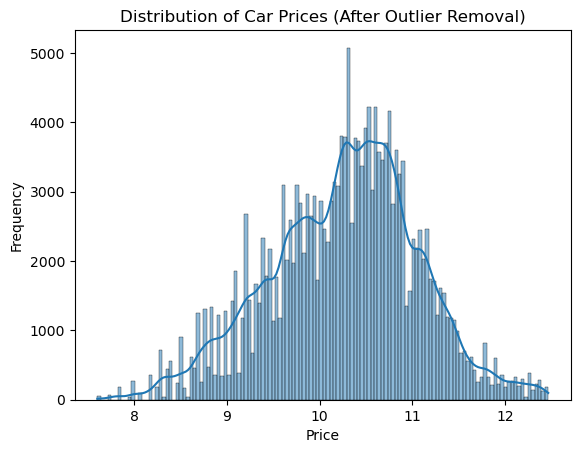

In [10]:
# Distribution of the target variable (car price) after removing outliers
sns.histplot(train_data['price'], kde=True)
plt.title('Distribution of Car Prices (After Outlier Removal)')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

## Cleaning Features

In [11]:
# Clean categorical features
categorical_features = train_data.select_dtypes(include=['object']).columns
categorical_features

Index(['brand', 'model', 'fuel_type', 'engine', 'transmission', 'ext_col',
       'int_col', 'accident'],
      dtype='object')

In [12]:
for col in categorical_features:
    # Convert to lowercase and strip leading/trailing whitespace
    train_data[col] = train_data[col].str.lower().str.strip()

In [13]:
# Count unique values for categorical features after cleaning
for col in categorical_features:
    count = train_data[col].value_counts().reset_index().shape[0]
    print(f"\n--- Unique Values in {col} (After Cleaning) {count}---")


--- Unique Values in brand (After Cleaning) 57---

--- Unique Values in model (After Cleaning) 1893---

--- Unique Values in fuel_type (After Cleaning) 7---

--- Unique Values in engine (After Cleaning) 1117---

--- Unique Values in transmission (After Cleaning) 51---

--- Unique Values in ext_col (After Cleaning) 317---

--- Unique Values in int_col (After Cleaning) 152---

--- Unique Values in accident (After Cleaning) 2---


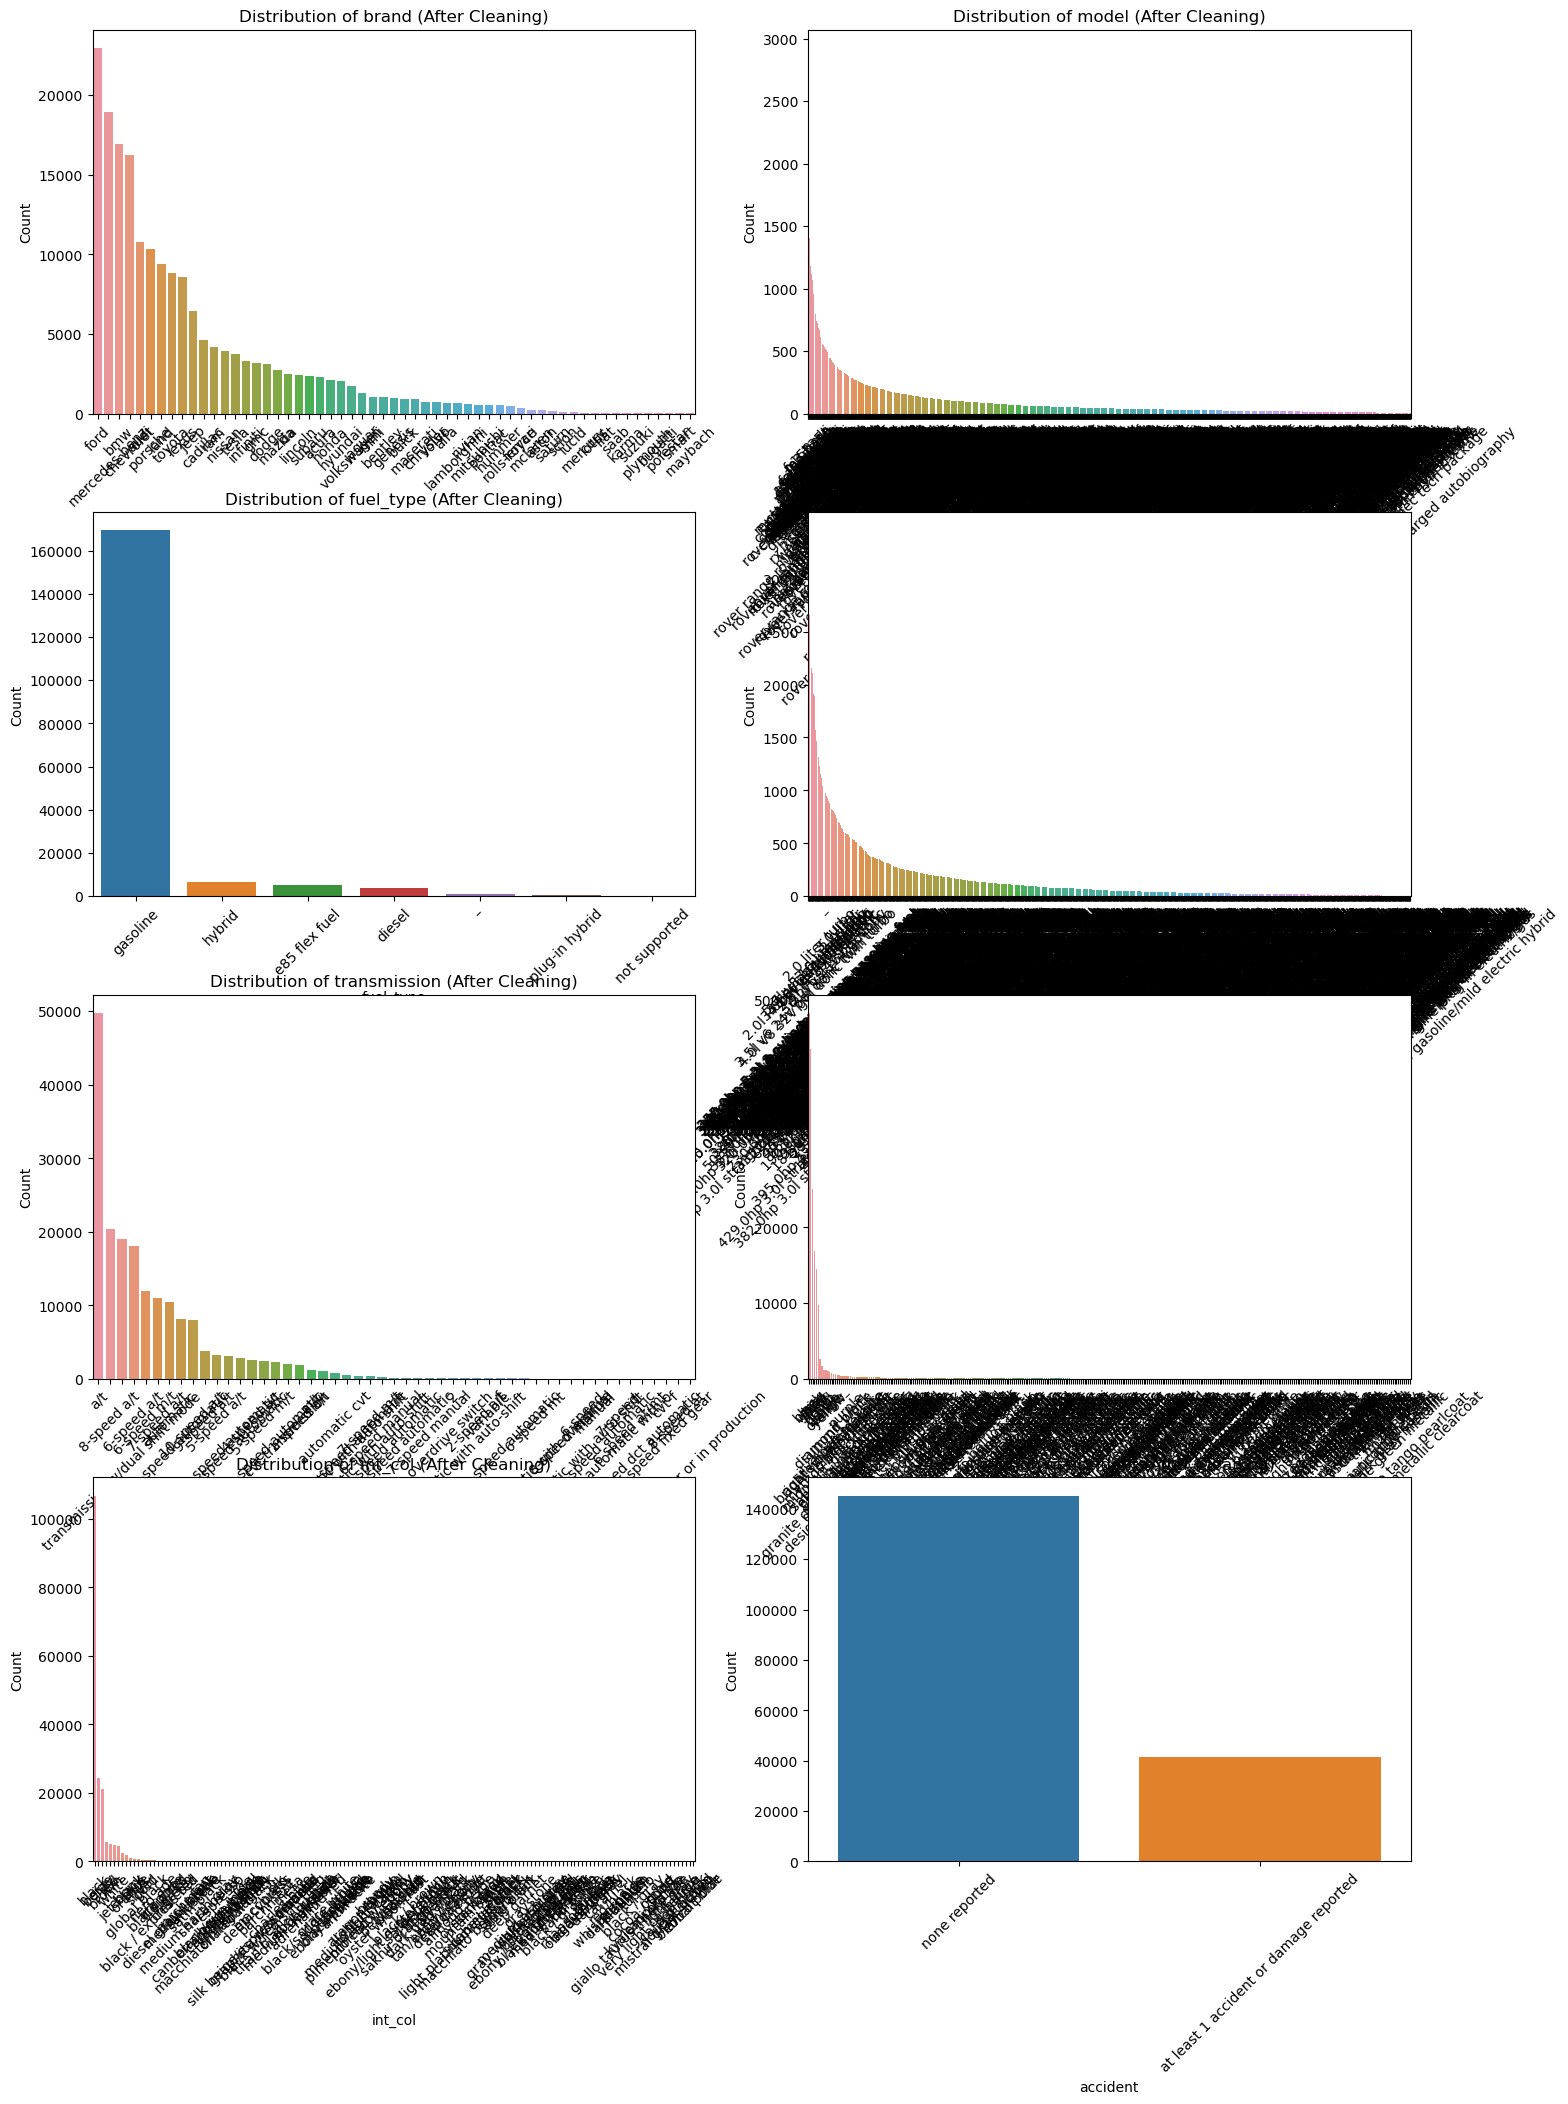

In [14]:
# Visualize distributions of categorical features after cleaning using subplots
num_features = len(categorical_features)
cols = 2
rows = (num_features // cols) + (num_features % cols)

fig, axes = plt.subplots(rows, cols, figsize=(15, 5 * rows))
fig.tight_layout(pad=5.0)

for i, col in enumerate(categorical_features):
    ax = axes[i // cols, i % cols]
    sns.countplot(data=train_data, x=col, order=train_data[col].value_counts().index, ax=ax)
    ax.set_title(f'Distribution of {col} (After Cleaning)')
    ax.set_xlabel(col)
    ax.set_ylabel('Count')
    ax.tick_params(axis='x', rotation=45)

# Hide any empty subplots
for i in range(num_features, rows * cols):
    fig.delaxes(axes[i // cols, i % cols])

plt.show()

### Brand

Start with Keeping All Values: Since you mentioned all the values are correct, it would be a good idea to initially keep all 57 brands and let the model determine the importance.

Test Reduction If Needed: If the model is struggling with overfitting or the computational complexity becomes a bottleneck, then consider reducing the number of categories by grouping rare brands.

In [15]:
train_data['brand'].value_counts()

brand
ford             22969
mercedes-benz    18931
bmw              16922
chevrolet        16226
audi             10796
porsche          10339
land              9422
toyota            8829
lexus             8605
jeep              6447
cadillac          4636
ram               4196
nissan            3915
tesla             3714
infiniti          3269
gmc               3201
dodge             3113
mazda             2713
kia               2479
lincoln           2417
subaru            2379
acura             2273
honda             2095
hyundai           2041
volkswagen        1758
jaguar            1305
mini              1064
bentley           1047
genesis            954
buick              938
maserati           914
chrysler           723
volvo              722
alfa               675
lamborghini        665
rivian             581
mitsubishi         549
pontiac            537
hummer             519
rolls-royce        498
ferrari            325
mclaren            216
aston              215
satur

### Model

In [16]:
train_data['model'].value_counts()

model
f-150 xlt                        2926
m3 base                          2217
camaro 2ss                       1704
m4 base                          1597
mustang gt premium               1523
                                 ... 
fortwo pure                         2
x5 xdrive40e                        1
xlr base                            1
integra w/a-spec tech package       1
x5 3.0i                             1
Name: count, Length: 1893, dtype: int64

In [17]:
# Group rare models
threshold = 100

model_counts = train_data['model'].value_counts()
rare_models = model_counts[model_counts < threshold].index
train_data['model'] = train_data['model'].apply(lambda x: 'other' if x in rare_models else x)

In [18]:
train_data['model'].value_counts()

model
other                       50592
f-150 xlt                    2926
m3 base                      2217
camaro 2ss                   1704
m4 base                      1597
                            ...  
911 carrera gts               100
x1 xdrive28i                  100
wrangler x                    100
santa fe sel                  100
town & country touring-l      100
Name: count, Length: 478, dtype: int64

### Fuel Type

In [19]:
train_data['fuel_type'].value_counts()

fuel_type
gasoline          169306
hybrid              6765
e85 flex fuel       5393
diesel              3920
–                    774
plug-in hybrid       520
not supported         15
Name: count, dtype: int64

In [20]:
# Clean 'fuel_type' feature
train_data['fuel_type'] = train_data['fuel_type'].replace(['–', 'not supported'], 'unknown')

# Group rare fuel types
train_data['fuel_type'] = train_data['fuel_type'].replace(['plug-in hybrid', 'unknown'], 'other')


In [21]:
train_data['fuel_type'].value_counts()

fuel_type
gasoline         169306
hybrid             6765
e85 flex fuel      5393
diesel             3920
other              1309
Name: count, dtype: int64

### Engine

In [22]:
train_data['engine'].value_counts()

engine
355.0hp 5.3l 8 cylinder engine gasoline fuel           3457
240.0hp 2.0l 4 cylinder engine gasoline fuel           2901
420.0hp 6.2l 8 cylinder engine gasoline fuel           2825
2.0l i4 16v gdi dohc turbo                             2654
375.0hp 3.5l v6 cylinder engine gasoline fuel          2440
                                                       ... 
70.0hp 1.0l 3 cylinder engine gasoline fuel               1
151.0hp 1.5l 4 cylinder engine gas/electric hybrid        1
111.0hp electric motor electric fuel system               1
443.0hp 4.4l 8 cylinder engine gasoline fuel              1
313.0hp 2.0l 4 cylinder engine plug-in electric/gas       1
Name: count, Length: 1117, dtype: int64

In [23]:
train_data['engine'].value_counts()[:20]

engine
355.0hp 5.3l 8 cylinder engine gasoline fuel             3457
240.0hp 2.0l 4 cylinder engine gasoline fuel             2901
420.0hp 6.2l 8 cylinder engine gasoline fuel             2825
2.0l i4 16v gdi dohc turbo                               2654
375.0hp 3.5l v6 cylinder engine gasoline fuel            2440
340.0hp 3.0l v6 cylinder engine gasoline fuel            2432
490.0hp 6.2l 8 cylinder engine gasoline fuel             2160
455.0hp 6.2l 8 cylinder engine gasoline fuel             2129
425.0hp 3.0l straight 6 cylinder engine gasoline fuel    2107
300.0hp 3.0l straight 6 cylinder engine gasoline fuel    2083
295.0hp 3.5l v6 cylinder engine gasoline fuel            1915
285.0hp 3.6l v6 cylinder engine gasoline fuel            1903
302.0hp 3.5l v6 cylinder engine gasoline fuel            1893
3.5l v6 24v pdi dohc twin turbo                          1822
301.0hp 4.6l 8 cylinder engine gasoline fuel             1568
5.7l v8 16v mpfi ohv                                     1503
2

In [24]:
# Extract features from 'engine'
# Extract horsepower
train_data['horsepower'] = train_data['engine'].str.extract(r'(\d+\.\d+)hp').astype(float)

# Extract engine size in liters
train_data['engine_size'] = train_data['engine'].str.extract(r'(\d+\.\d+)l').astype(float)

# Extract number of cylinders
train_data['num_cylinders'] = train_data['engine'].str.extract(r'(\d+) cylinder').astype(float)


In [25]:
# Fill any missing values in the extracted features with median
train_data['horsepower'].fillna(train_data['horsepower'].median(), inplace=True)
train_data['engine_size'].fillna(train_data['engine_size'].median(), inplace=True)
train_data['num_cylinders'].fillna(train_data['num_cylinders'].median(), inplace=True)

# Drop the original 'engine' column as it is now represented by extracted features
train_data.drop(columns=['engine'], inplace=True)

In [26]:
train_data.head()

,id,brand,model,model_year,milage,fuel_type,transmission,ext_col,int_col,accident,price,horsepower,engine_size,num_cylinders
0,0,mini,cooper s base,2007,213000,gasoline,a/t,yellow,gray,none reported,8.343078,172.0,1.6,4.0
1,1,lincoln,other,2002,143250,gasoline,a/t,silver,beige,at least 1 accident or damage reported,8.517193,252.0,3.9,8.0
2,2,chevrolet,other,2002,136731,e85 flex fuel,a/t,blue,gray,none reported,9.539716,320.0,5.3,8.0
3,3,genesis,other,2017,19500,gasoline,transmission w/dual shift mode,black,black,none reported,10.714440,420.0,5.0,8.0
4,4,mercedes-benz,metris base,2021,7388,gasoline,7-speed a/t,black,beige,none reported,11.487618,208.0,2.0,4.0


### Transmission

In [27]:
train_data['transmission'].value_counts()

transmission
a/t                                                   49738
8-speed a/t                                           20410
transmission w/dual shift mode                        19080
6-speed a/t                                           18006
6-speed m/t                                           11945
7-speed a/t                                           11027
automatic                                             10512
8-speed automatic                                      8158
10-speed a/t                                           7976
9-speed a/t                                            3814
5-speed a/t                                            3210
10-speed automatic                                     3107
6-speed automatic                                      2780
4-speed a/t                                            2542
5-speed m/t                                            2408
9-speed automatic                                      2263
cvt transmission           

In [28]:
# Extract features from 'transmission'
# Extract transmission type (automatic or manual)
train_data['transmission_type'] = train_data['transmission'].apply(
    lambda x: 'automatic' if re.search(r'a/t|automatic|cvt', x) else 'manual'
)

# Extract number of speeds
train_data['num_speeds'] = train_data['transmission'].str.extract(r'(\d+)-speed').astype(float)

# Fill any missing values in the extracted features with median
train_data['num_speeds'].fillna(train_data['num_speeds'].median(), inplace=True)

# Drop the original 'transmission' column as it is now represented by extracted features
train_data.drop(columns=['transmission'], inplace=True)

In [29]:
train_data.head()

,id,brand,model,model_year,milage,fuel_type,ext_col,int_col,accident,price,horsepower,engine_size,num_cylinders,transmission_type,num_speeds
0,0,mini,cooper s base,2007,213000,gasoline,yellow,gray,none reported,8.343078,172.0,1.6,4.0,automatic,7.0
1,1,lincoln,other,2002,143250,gasoline,silver,beige,at least 1 accident or damage reported,8.517193,252.0,3.9,8.0,automatic,7.0
2,2,chevrolet,other,2002,136731,e85 flex fuel,blue,gray,none reported,9.539716,320.0,5.3,8.0,automatic,7.0
3,3,genesis,other,2017,19500,gasoline,black,black,none reported,10.714440,420.0,5.0,8.0,manual,7.0
4,4,mercedes-benz,metris base,2021,7388,gasoline,black,beige,none reported,11.487618,208.0,2.0,4.0,automatic,7.0


### Ext color

In [30]:
train_data['ext_col'].value_counts()

ext_col
black                    48281
white                    43545
gray                     25067
silver                   16923
blue                     14470
                         ...  
blu eleos                    5
tempest                      5
gt silver                    4
blue caelum                  3
mango tango pearlcoat        2
Name: count, Length: 317, dtype: int64

In [31]:
# Group rare models
threshold = 100

model_counts = train_data['ext_col'].value_counts()
rare_models = model_counts[model_counts < threshold].index
train_data['ext_col'] = train_data['ext_col'].apply(lambda x: 'other' if x in rare_models else x)

In [32]:
train_data['ext_col'].value_counts()

ext_col
black                                      48281
white                                      43545
gray                                       25067
silver                                     16923
blue                                       14470
                                           ...  
firenze red                                  109
daytona gray                                 105
ultra white                                  104
iconic silver metallic                       102
daytona gray pearl effect w/ black roof      100
Name: count, Length: 61, dtype: int64

### Int color

In [33]:
train_data['int_col'].value_counts()

int_col
black           106716
beige            24416
gray             21131
brown             5768
red               5065
                 ...  
nougat brown         7
beluga               7
classic red          6
bianco polar         5
cobalt blue          4
Name: count, Length: 152, dtype: int64

In [34]:
# Group rare models
threshold = 100

model_counts = train_data['int_col'].value_counts()
rare_models = model_counts[model_counts < threshold].index
train_data['int_col'] = train_data['int_col'].apply(lambda x: 'other' if x in rare_models else x)

In [35]:
train_data.head()

,id,brand,model,model_year,milage,fuel_type,ext_col,int_col,accident,price,horsepower,engine_size,num_cylinders,transmission_type,num_speeds
0,0,mini,cooper s base,2007,213000,gasoline,yellow,gray,none reported,8.343078,172.0,1.6,4.0,automatic,7.0
1,1,lincoln,other,2002,143250,gasoline,silver,beige,at least 1 accident or damage reported,8.517193,252.0,3.9,8.0,automatic,7.0
2,2,chevrolet,other,2002,136731,e85 flex fuel,blue,gray,none reported,9.539716,320.0,5.3,8.0,automatic,7.0
3,3,genesis,other,2017,19500,gasoline,black,black,none reported,10.714440,420.0,5.0,8.0,manual,7.0
4,4,mercedes-benz,metris base,2021,7388,gasoline,black,beige,none reported,11.487618,208.0,2.0,4.0,automatic,7.0


### Accident

In [36]:
train_data['accident'].value_counts()

accident
none reported                             145199
at least 1 accident or damage reported     41494
Name: count, dtype: int64

In [37]:
# Encode 'accident' feature as binary
train_data['accident'] = train_data['accident'].apply(lambda x: 0 if x == 'none reported' else 1)

In [38]:
train_data.head()

,id,brand,model,model_year,milage,fuel_type,ext_col,int_col,accident,price,horsepower,engine_size,num_cylinders,transmission_type,num_speeds
0,0,mini,cooper s base,2007,213000,gasoline,yellow,gray,0,8.343078,172.0,1.6,4.0,automatic,7.0
1,1,lincoln,other,2002,143250,gasoline,silver,beige,1,8.517193,252.0,3.9,8.0,automatic,7.0
2,2,chevrolet,other,2002,136731,e85 flex fuel,blue,gray,0,9.539716,320.0,5.3,8.0,automatic,7.0
3,3,genesis,other,2017,19500,gasoline,black,black,0,10.714440,420.0,5.0,8.0,manual,7.0
4,4,mercedes-benz,metris base,2021,7388,gasoline,black,beige,0,11.487618,208.0,2.0,4.0,automatic,7.0


### Model Year

In [39]:
train_data['model_year'].describe()

count    186693.000000
mean       2015.793977
std           5.660739
min        1974.000000
25%        2013.000000
50%        2017.000000
75%        2020.000000
max        2024.000000
Name: model_year, dtype: float64

In [41]:
max_year = train_data['model_year'].max()
max_year

2024

In [43]:
# Create 'age' feature from 'model_year'
train_data['age'] = max_year - train_data['model_year']

# Drop the original 'model_year' column
train_data.drop(columns=['model_year'], inplace=True)

In [44]:
train_data.head()

,id,brand,model,milage,fuel_type,ext_col,int_col,accident,price,horsepower,engine_size,num_cylinders,transmission_type,num_speeds,age
0,0,mini,cooper s base,213000,gasoline,yellow,gray,0,8.343078,172.0,1.6,4.0,automatic,7.0,17
1,1,lincoln,other,143250,gasoline,silver,beige,1,8.517193,252.0,3.9,8.0,automatic,7.0,22
2,2,chevrolet,other,136731,e85 flex fuel,blue,gray,0,9.539716,320.0,5.3,8.0,automatic,7.0,22
3,3,genesis,other,19500,gasoline,black,black,0,10.714440,420.0,5.0,8.0,manual,7.0,7
4,4,mercedes-benz,metris base,7388,gasoline,black,beige,0,11.487618,208.0,2.0,4.0,automatic,7.0,3
